## SIFT Scale Invariat Feature Transform

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Image

In [4]:
img = cv2.imread("basil.png")
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]]

In [5]:
cv2.imshow("SIFT",img)
cv2.waitKey(0)

27

## Color Convertion

In [6]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)

In [7]:
sc_iv = cv2.pyrDown(rgb)
sc_iv2 = cv2.pyrDown(sc_iv)
num_rows, num_cols = sc_iv2.shape[:2]
print(num_rows)
print(num_cols)

130
90


In [8]:
cv2.imshow("orginal", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("first scale", sc_iv)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("second scale", sc_iv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotational Invariance

In [9]:
rot_iv = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),45,1)

# Affine Transformation

In [10]:
aff = cv2.warpAffine(sc_iv,rot_iv, (num_cols, num_rows))

# Color Conversion

In [11]:
rot_gray = cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

# Rotational Display

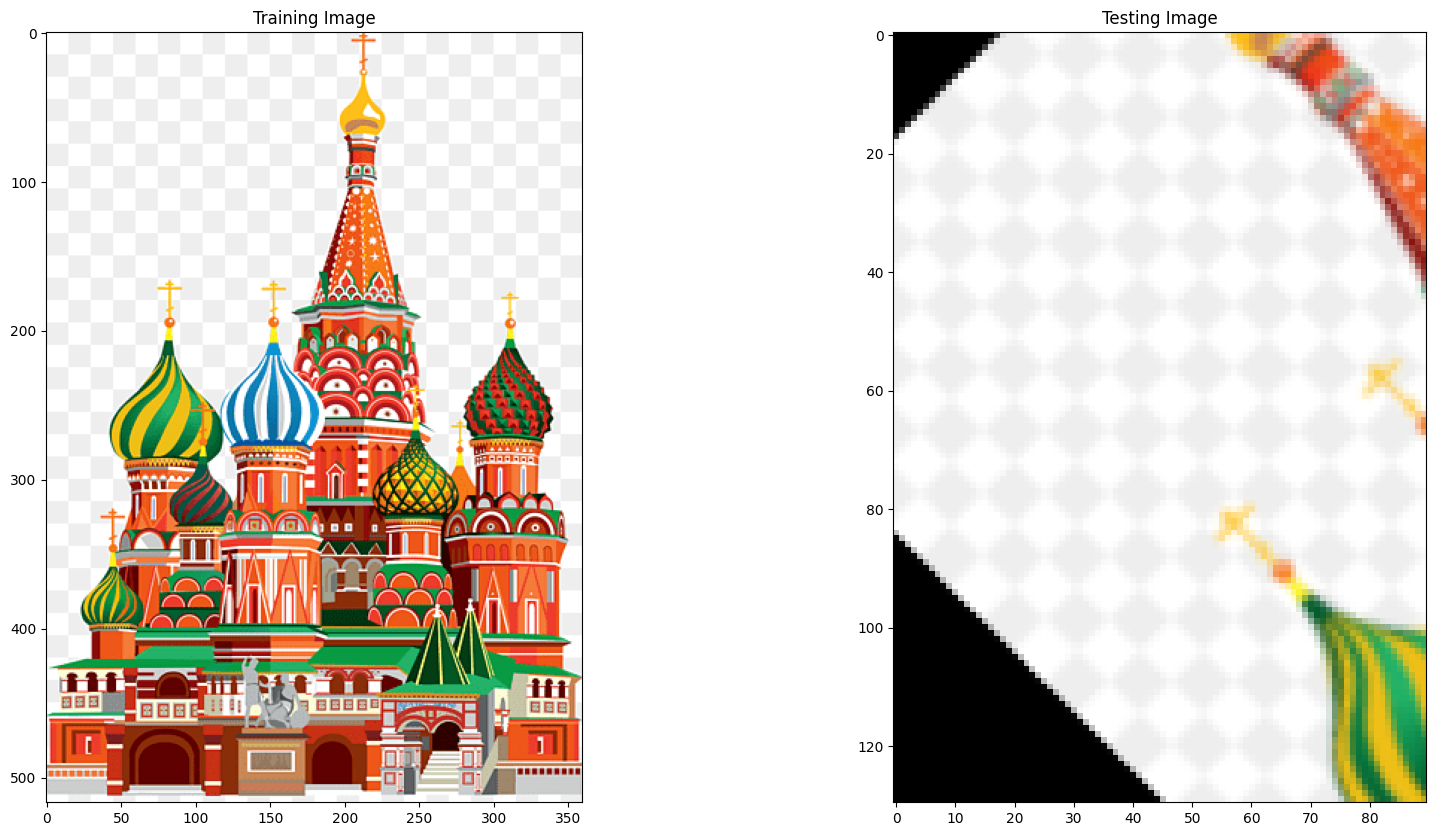

In [14]:
fx, plots= plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(rgb)

plots[1].set_title("Testing Image")
plots[1].imshow(aff)

# Let's Go SIFT

In [17]:
cv2.SIFT_create()

< cv2.SIFT 000001EC0A657690>

In [18]:
cv2.xfeatures2d.SIFT_create()

AttributeError: module 'cv2.xfeatures2d' has no attribute 'SIFT_create'

In [19]:
sift = cv2.xfeatures2ds2d.SIFT_create()

AttributeError: module 'cv2' has no attribute 'xfeatures2ds2d'

# Detect and Compute

In [ ]:
train_kp, train_des =sift.detectAndCompute(sc_iv, None)
test_kp, test_des =sift.dectectAndCompute(rot_gray, None)

# KeyPoints

In [ ]:
kp_wo_size = np.copy(rgb)
kp_w_size = np.copy(rgb)

# Drawing KeyPoints

In [ ]:
cv2.drawKeypoints(sc_iv, train_kp, kp_w_size, color = (0,255,0))
cv2.drawKeypoints(sc_iv, train_kp, kp_w_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Keypoint Display

In [ ]:
fx, plots= plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Train keypoints with size")
plots[0].imshow(kp_w_size, cmap= 'gray')

plots[1].set_title("Train keypoints without size")
plots[1].imshow(kp_wo_size, cmap= 'gray')

# Brute Force Matcher Object

In [ ]:
bfm = cv2.BFMatcher(cv2.Norm_L1,crossCheck=False)

# Matching

In [ ]:
match = bfm.match(train_des, test_des)

# Sorting

In [ ]:
match = sorted(match, key =lambda x : x.distance)

In [22]:
import cv2
sift = cv2.SIFT_create()


In [23]:
import cv2
print(cv2.__version__)



4.10.0


In [ ]:
pip install opencv-python opencv-contrib-python --upgrade